In [2]:
import wurst
import bw2io, bw2data
import bw2calc
import pandas as pd
import numpy as np
import matplotlib as plt
import random
import itertools
from statistics import mean

In [3]:
bw2io.restore_project_directory("/srv/data/ecoinvent-3.9.1-cutoff.tar.gz", project_name="K_iss")

Restoring project backup archive - this could take a few minutes...


ValueError: Project K_iss already exists

In [3]:
bw2data.projects.set_current("K_iss")

In [4]:
bw2data.databases

Databases dictionary with 2 object(s):
	biosphere3
	ecoinvent-3.9.1-cutoff

In [5]:
eidb = bw2data.Database("ecoinvent-3.9.1-cutoff")

In [6]:
df = pd.read_csv('FR_2022_hourly.csv', usecols=["Datetime (UTC)", "CO2"])
df

,Datetime (UTC),CO2
0,01/01/2022 00:00,0.04384
1,01/01/2022 01:00,0.04622
2,01/01/2022 02:00,0.04636
3,01/01/2022 03:00,0.04506
4,01/01/2022 04:00,0.04469
...,...,...
8755,31/12/2022 19:00,0.03908
8756,31/12/2022 20:00,0.03870
8757,31/12/2022 21:00,0.03999
8758,31/12/2022 22:00,0.03931


In [7]:
df.sort_values(by='Datetime (UTC)')

,Datetime (UTC),CO2
0,01/01/2022 00:00,0.04384
1,01/01/2022 01:00,0.04622
2,01/01/2022 02:00,0.04636
3,01/01/2022 03:00,0.04506
4,01/01/2022 04:00,0.04469
...,...,...
8755,31/12/2022 19:00,0.03908
8756,31/12/2022 20:00,0.03870
8757,31/12/2022 21:00,0.03999
8758,31/12/2022 22:00,0.03931


In [8]:
year= 2022
timestep = pd.Series(pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31 23:00:00', freq='H'))
dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')
num_repeats = 24

In [9]:
a= pd.DataFrame({'Timestamp': timestep})
a['Date']= pd.DataFrame(dates.repeat(num_repeats),columns=['date'])
a['Hour'] = pd.to_datetime(a['Timestamp']).dt.strftime('%H:%M:%S')
a['CO2']=df["CO2"]
a

,Timestamp,Date,Hour,CO2
0,2022-01-01 00:00:00,2022-01-01,00:00:00,0.04384
1,2022-01-01 01:00:00,2022-01-01,01:00:00,0.04622
2,2022-01-01 02:00:00,2022-01-01,02:00:00,0.04636
3,2022-01-01 03:00:00,2022-01-01,03:00:00,0.04506
4,2022-01-01 04:00:00,2022-01-01,04:00:00,0.04469
...,...,...,...,...
8755,2022-12-31 19:00:00,2022-12-31,19:00:00,0.03908
8756,2022-12-31 20:00:00,2022-12-31,20:00:00,0.03870
8757,2022-12-31 21:00:00,2022-12-31,21:00:00,0.03999
8758,2022-12-31 22:00:00,2022-12-31,22:00:00,0.03931


In [10]:
def sort_data(group):
    return group.sort_values('CO2', ascending=True)

In [11]:
grouped_data = a.groupby('Date').apply(sort_data)
grouped_data

Timestamp       Date      Hour      CO2
Date                                                             
2022-01-01 13   2022-01-01 13:00:00 2022-01-01  13:00:00  0.03661
           17   2022-01-01 17:00:00 2022-01-01  17:00:00  0.03696
           14   2022-01-01 14:00:00 2022-01-01  14:00:00  0.03706
           16   2022-01-01 16:00:00 2022-01-01  16:00:00  0.03707
           15   2022-01-01 15:00:00 2022-01-01  15:00:00  0.03749
...                             ...        ...       ...      ...
2022-12-31 8753 2022-12-31 17:00:00 2022-12-31  17:00:00  0.04000
           8739 2022-12-31 03:00:00 2022-12-31  03:00:00  0.04031
           8736 2022-12-31 00:00:00 2022-12-31  00:00:00  0.04088
           8738 2022-12-31 02:00:00 2022-12-31  02:00:00  0.04157
           8759 2022-12-31 23:00:00 2022-12-31  23:00:00  0.04217

[8760 rows x 4 columns]

In [12]:
#charge= pd.read_csv('emobpy_timeseries_hourly.csv')#, usecols=["datetime", "Consumer_0_elec"])

# ele_cons_day=18.58 #kWh of EV ID 80 of the 01/01/2020

In [13]:
test=a.set_index("Timestamp")
test

,Date,Hour,CO2
Timestamp,,,
2022-01-01 00:00:00,2022-01-01,00:00:00,0.04384
2022-01-01 01:00:00,2022-01-01,01:00:00,0.04622
2022-01-01 02:00:00,2022-01-01,02:00:00,0.04636
2022-01-01 03:00:00,2022-01-01,03:00:00,0.04506
2022-01-01 04:00:00,2022-01-01,04:00:00,0.04469
...,...,...,...
2022-12-31 19:00:00,2022-12-31,19:00:00,0.03908
2022-12-31 20:00:00,2022-12-31,20:00:00,0.03870
2022-12-31 21:00:00,2022-12-31,21:00:00,0.03999


In [14]:
opt=test.groupby("Date").min(numeric_only=True)
opt

,CO2
Date,
2022-01-01,0.03661
2022-01-02,0.03353
2022-01-03,0.03898
2022-01-04,0.03391
2022-01-05,0.04184
...,...
2022-12-27,0.03536
2022-12-28,0.03161
2022-12-29,0.03679


In [ ]:
hour[]=pd.DataFrame()

for item in opt
df.query("team=='A'")["points"]

In [15]:
pes= test.groupby("Date").max(numeric_only=True)
pes

,CO2
Date,
2022-01-01,0.04636
2022-01-02,0.04395
2022-01-03,0.05342
2022-01-04,0.07299
2022-01-05,0.09040
...,...
2022-12-27,0.05631
2022-12-28,0.03701
2022-12-29,0.04616


In [16]:
temp = pd.read_csv('Temperature_France_2022.csv', usecols=["Average_FR"])
temp

,Average_FR
0,9.85
1,11.10
2,10.20
3,10.45
4,6.30
...,...
360,8.00
361,9.80
362,11.70
363,11.15


In [17]:
#Temperature for 2022 originate from: https://www.visualcrossing.com/weather/weather-data-services

# https://doi.org/10.1016/j.jclepro.2019.119403
#The study found that, when the ambient temperature 
#is lower than 10 C, electricity consumption increases 2.4 kWh/100 km for every 5 C decrease in temperature. 
#When it is higher than 28 C, EC increases 2.3 kWh/100 km for every 5 C increase in temperature.

year= 2022
timestep = pd.Series(pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31 23:00:00', freq='D'))
dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')
num_repeats = 24

b= pd.DataFrame({'Timestamp': timestep})
b['Date']= pd.DataFrame(dates.repeat(num_repeats),columns=['date'])
b['Hour'] = pd.to_datetime(a['Timestamp']).dt.strftime('%H:%M:%S')
b['Inside temp car'] = list(itertools.repeat(19, 365))
b['Temperature_FR']=temp
b['E_demand@19(kWh/100km)']= list(itertools.repeat(14.4, 365))
b

,Timestamp,Date,Hour,Inside temp car,Temperature_FR,E_demand@19(kWh/100km)
0,2022-01-01,2022-01-01,00:00:00,19,9.85,14.4
1,2022-01-02,2022-01-01,01:00:00,19,11.10,14.4
2,2022-01-03,2022-01-01,02:00:00,19,10.20,14.4
3,2022-01-04,2022-01-01,03:00:00,19,10.45,14.4
4,2022-01-05,2022-01-01,04:00:00,19,6.30,14.4
...,...,...,...,...,...,...
360,2022-12-27,2022-01-16,00:00:00,19,8.00,14.4
361,2022-12-28,2022-01-16,01:00:00,19,9.80,14.4
362,2022-12-29,2022-01-16,02:00:00,19,11.70,14.4
363,2022-12-30,2022-01-16,03:00:00,19,11.15,14.4


In [18]:
s=[]

for item in b['Temperature_FR']:
    if item<=10:
        s.append(((item/5) * 2.4)+14.4),
    else: s.append(0)

b['cold']=s

In [19]:
r=[]

for item in b['Temperature_FR']:
    if item>=25:
        r.append(((item/5) * 2.3)+14.4),
    else: r.append(0)

b['warm']=r

b['total_e_consumption']=b['cold']+b['warm']

In [20]:
t=[]

for item in b['total_e_consumption']:
    if item==0:
        t.append(14.4)
    else: t.append(item)

b['total_e_consumption_1']=t
b

,Timestamp,Date,Hour,Inside temp car,Temperature_FR,E_demand@19(kWh/100km),cold,warm,total_e_consumption,total_e_consumption_1
0,2022-01-01,2022-01-01,00:00:00,19,9.85,14.4,19.128,0.0,19.128,19.128
1,2022-01-02,2022-01-01,01:00:00,19,11.10,14.4,0.000,0.0,0.000,14.400
2,2022-01-03,2022-01-01,02:00:00,19,10.20,14.4,0.000,0.0,0.000,14.400
3,2022-01-04,2022-01-01,03:00:00,19,10.45,14.4,0.000,0.0,0.000,14.400
4,2022-01-05,2022-01-01,04:00:00,19,6.30,14.4,17.424,0.0,17.424,17.424
...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,2022-01-16,00:00:00,19,8.00,14.4,18.240,0.0,18.240,18.240
361,2022-12-28,2022-01-16,01:00:00,19,9.80,14.4,19.104,0.0,19.104,19.104
362,2022-12-29,2022-01-16,02:00:00,19,11.70,14.4,0.000,0.0,0.000,14.400
363,2022-12-30,2022-01-16,03:00:00,19,11.15,14.4,0.000,0.0,0.000,14.400


In [21]:
pes_con_v1= b['total_e_consumption_1'].values*pes['CO2'].values
pes_con_v1.sum()

625.52906578

In [22]:
opt_con_v1= b['total_e_consumption_1'].values*opt['CO2'].values
opt_con_v1.sum()

443.03605350000004

In [23]:
avg_fr= [act for act in eidb if 'market for electricity, low voltage'in act['name']
                    and 'FR' in act['location']][0]

avg_fr

'market for electricity, low voltage' (kilowatt hour, FR, None)

In [24]:
ipcc=[method for method in bw2data.methods if 'IPCC' in str(method) 
                                and 'climate change' in str(method)][0]
print(ipcc)
print(type(ipcc))

('IPCC 2013 no LT', 'climate change no LT', 'global temperature change potential (GTP100) no LT')
<class 'tuple'>


In [25]:
lca = bw2calc.LCA({avg_fr:1}, ipcc)
lca.lci()
lca.lcia()
lca.score

0.08141798883602024

In [26]:
avg_con=lca.score* b['total_e_consumption_1'].values
avg_con.sum()

481.5424612352223

[Text(0, 0, '443.036'), Text(0, 0, '481.542'), Text(0, 0, '625.529')]

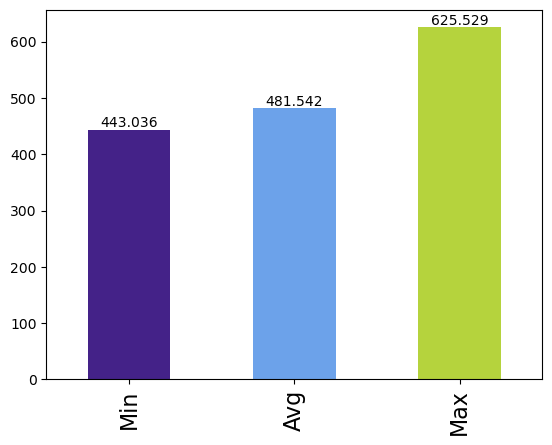

In [27]:
Scores = [sum(opt_con_v1), sum(avg_con), sum(pes_con_v1)]
score_series = pd.Series(Scores)
x_labels = ['Min', 'Avg', 'Max']

fig = score_series.plot(kind='bar', color =['#442288', '#6CA2EA', '#B5D33D'])
fig.set_xticklabels(x_labels, fontsize=16)
fig.bar_label(fig.containers[0], label_type='edge')

In [28]:
annual_vkm = 200*0.144*365
annual_vkm
lifetime = 20
lt_mileage = annual_vkm*lifetime
lt_mileage

210239.99999999997